# Experiment Tutorial

In [1]:
import sys
sys.path.insert(0, '/home/kylee/work/projects/7_model_compress/2_shrinkbench/')
from experiment import PruningExperiment
import pruning
# import importlib
# importlib.reload(pruning)

The `DATAPATH` and `WEIGHTSPATH` environment variables are used to tell the framework where to look for datasets and pretrained weights respectively.

In [2]:
import os
os.environ['DATAPATH'] = '/home/kylee/work/projects/7_model_compress/2_shrinkbench/data/'
os.environ['WEIGHTSPATH'] = '/home/kylee/work/projects/7_model_compress/2_shrinkbench/pretrained/mnist/mnistnet.pt'

In [5]:
import torchvision
root = '/home/kylee/work/projects/7_model_compress/2_shrinkbench/data'
torchvision.datasets.MNIST(os.environ['DATAPATH'], train=True, transform=None, target_transform=None, download=True)

Extracting /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw/train-images-idx3-ubyte.gz to /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw


Extracting /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw




Extracting /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw


Extracting /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/kylee/work/projects/7_model_compress/2_shrinkbench/data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/kylee/work/projects/7_model_compress/2_shrinkbench/data
    Split: Train

In [3]:
from IPython.display import clear_output
clear_output()

We run experiments for our MNIST network for logarithmically spaced compression ratios

In [4]:
for strategy in ['RandomPruning', 'GlobalMagWeight', 'LayerMagWeight']:
    for  c in [1,2,4,8,16,32,64]:
        exp = PruningExperiment(dataset='MNIST', 
                                model='MnistNet',
                                strategy=strategy,
                                compression=c,
                                train_kwargs={'epochs':10})
        exp.run()
        #clear_output()

We then collect output from experiment folders and plot the diferent metrics easily

In [5]:
from plot import df_from_results, plot_df

In [6]:
df = df_from_results('results')

With the provided functions, it is easy to generate plots 

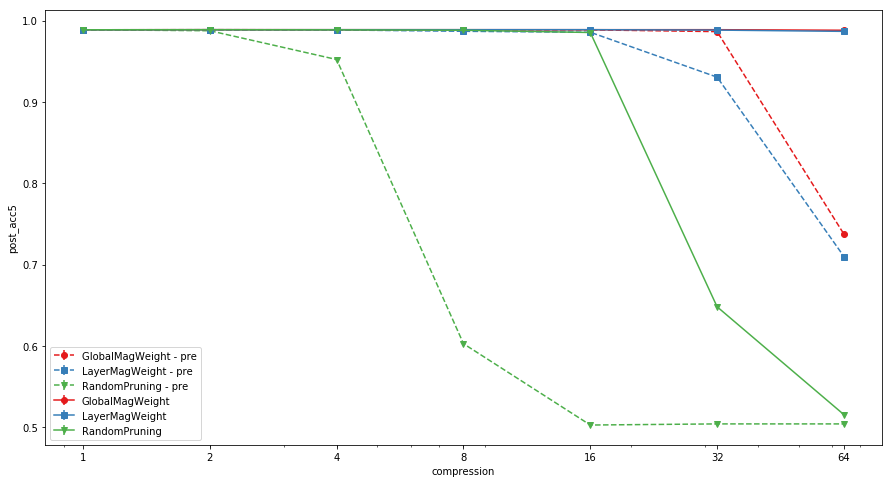

In [7]:
plot_df(df, 'compression', 'pre_acc5', markers='strategy', line='--', colors='strategy', suffix=' - pre')
plot_df(df, 'compression', 'post_acc5', markers='strategy', fig=False, colors='strategy')

We can also check the theoretical speedup and see that layerwise provides larger FLOPS speedups because of the even pruning of the conv layers

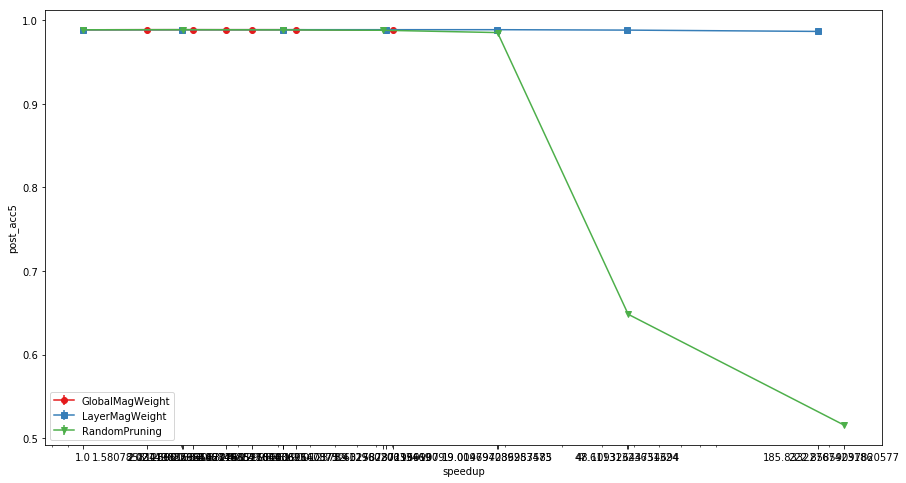

In [11]:
from matplotlib import pyplot as plt
import numpy as np
plot_df(df, 'speedup', 'post_acc5', colors='strategy', markers='strategy')
# plt.yscale('log')
# plt.ylim(0.996,0.9995)
# plt.xticks(2**np.arange(7))
# plt.gca().set_xticklabels(map(str, 2**np.arange(7)))
# None

We can easily check if the compression is matching our expectation by looking at the relative error. As expected, random pruning does worst.

In [12]:
df['compression_err'] = (df['real_compression'] - df['compression'])/df['compression']

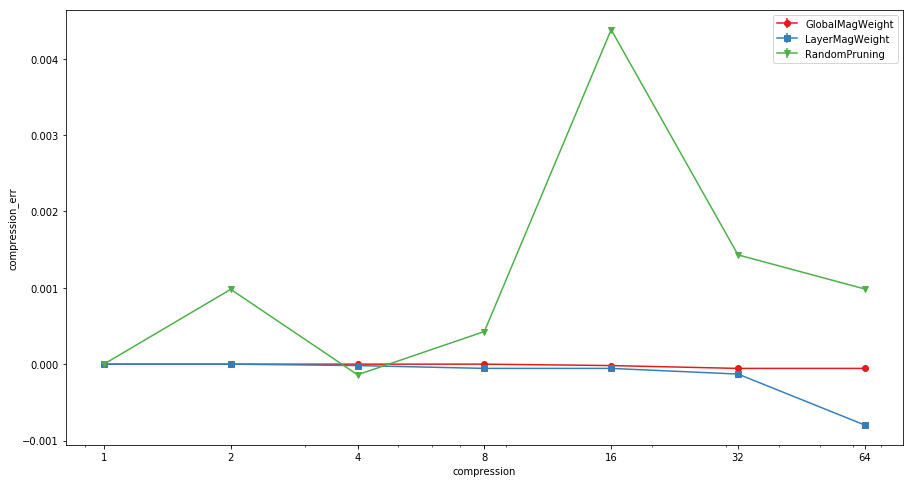

In [13]:
plot_df(df, 'compression', 'compression_err', colors='strategy', markers='strategy')